In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset into a dataframe df_p3
data_p3=pd.read_csv("/content/CE802_P3_Data.csv")

In [4]:
# Displaying the first six rows of the dataframe
data_p3.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,17.58,98.59,1879.44,0.29,389.90,Europe,-1651.25,8.84,-25.90,Very low,...,46.32,64.11,-21.84,51656.67,530.32,5.79,-49.94,287.97,24.91,-8.93
1,-2.48,97.97,1622.75,4.78,-876.02,Rest,-1403.87,-877.44,-29.20,High,...,68.64,58.14,-17.10,66581.28,474.36,5.13,-154.02,-1403.97,24.58,21.90
2,3.98,118.94,3050.01,0.53,76.62,Europe,-1730.32,-46.74,-39.30,Very high,...,44.19,80.55,-20.28,55418.91,650.25,2.16,-139.38,-46.92,-1.00,56.20
3,5.88,147.61,1844.40,0.81,-929.74,Europe,-1427.05,581.78,-28.88,Very low,...,55.80,43.95,-18.00,56585.52,1348.02,1.98,-125.06,-958.44,8.50,-8.93
4,-20.16,107.74,1860.04,18.01,2113.90,Rest,-1335.50,-1171.70,-27.06,Medium,...,40.80,70.59,-25.28,45502.59,773.48,23.91,-230.22,966.87,9.71,-8.93


In [5]:
# Finding the datatypes of all the features
data_p3.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6         object
F7        float64
F8        float64
F9        float64
F10        object
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17         int64
F18       float64
F19       float64
F20       float64
F21         int64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32       float64
F33       float64
F34       float64
Target    float64
dtype: object

In [6]:
data_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   float64
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   float64
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   object 
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   object 
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   float64
 16  F17     1400 non-null   int64  
 17  F18     1400 non-null   float64
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   int64  
 21  F22     1400 non-null   float64
 22  

In [7]:
# Checking for missing values
data_p3.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

<ipython-input-8-ebee1f3816d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_p3.corr()


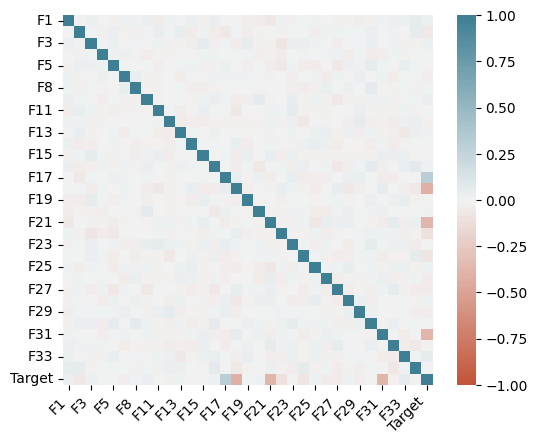

In [8]:
# Checking corelation among the variables
corr = data_p3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
# Encoding variables F6 and F10 since they are catogorical variables.
X_enc = data_p3[['F6','F10']]
X_enc = pd.get_dummies(data=X_enc, drop_first=True)


In [10]:
data_p3_edited = pd.concat([data_p3,X_enc],axis=1)
data_p3_edited = data_p3_edited.drop(['F6'], axis = 1)
data_p3_edited = data_p3_edited.drop(['F10'], axis = 1)

In [11]:
data_p3_edited.head()

,F1,F2,F3,F4,F5,F7,F8,F9,F11,F12,...,F33,F34,Target,F6_Rest,F6_UK,F6_USA,F10_Low,F10_Medium,F10_Very high,F10_Very low
0,17.58,98.59,1879.44,0.29,389.90,-1651.25,8.84,-25.90,5.06,2567.48,...,287.97,24.91,-8.93,0,0,0,0,0,0,1
1,-2.48,97.97,1622.75,4.78,-876.02,-1403.87,-877.44,-29.20,3.37,2205.16,...,-1403.97,24.58,21.90,1,0,0,0,0,0,0
2,3.98,118.94,3050.01,0.53,76.62,-1730.32,-46.74,-39.30,5.47,1857.12,...,-46.92,-1.00,56.20,0,0,0,0,0,1,0
3,5.88,147.61,1844.40,0.81,-929.74,-1427.05,581.78,-28.88,0.20,1861.08,...,-958.44,8.50,-8.93,0,0,0,0,0,0,1
4,-20.16,107.74,1860.04,18.01,2113.90,-1335.50,-1171.70,-27.06,4.54,1138.24,...,966.87,9.71,-8.93,1,0,0,0,1,0,0


In [12]:
# Seperating input and target variable from data_p3_edited dataset
data_p3_edited_features=data_p3_edited.drop(['Target'],axis=1)
data_p3_edited_outcome=data_p3_edited['Target']
print(data_p3_edited_features.head())
print(data_p3_edited_outcome.head())

      F1      F2       F3     F4       F5       F7       F8     F9   F11  \
0  17.58   98.59  1879.44   0.29   389.90 -1651.25     8.84 -25.90  5.06   
1  -2.48   97.97  1622.75   4.78  -876.02 -1403.87  -877.44 -29.20  3.37   
2   3.98  118.94  3050.01   0.53    76.62 -1730.32   -46.74 -39.30  5.47   
3   5.88  147.61  1844.40   0.81  -929.74 -1427.05   581.78 -28.88  0.20   
4 -20.16  107.74  1860.04  18.01  2113.90 -1335.50 -1171.70 -27.06  4.54   

       F12  ...     F32      F33    F34  F6_Rest  F6_UK  F6_USA  F10_Low  \
0  2567.48  ...  -49.94   287.97  24.91        0      0       0        0   
1  2205.16  ... -154.02 -1403.97  24.58        1      0       0        0   
2  1857.12  ... -139.38   -46.92  -1.00        0      0       0        0   
3  1861.08  ... -125.06  -958.44   8.50        0      0       0        0   
4  1138.24  ... -230.22   966.87   9.71        1      0       0        0   

   F10_Medium  F10_Very high  F10_Very low  
0           0              0             

In [13]:
# Splitting the data into training and test
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_p3_edited_features, data_p3_edited_outcome, test_size=0.2,random_state=42)

In [14]:
# Reading the dataset into a dataframe df_p3_test
data_p3_test=pd.read_csv("/content/CE802_P3_Test.csv")

In [15]:
data_p3_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,6.68,86.02,1995.28,148.00,853.52,Europe,-1048.23,-969.14,-26.56,Very high,...,39.15,65.01,-22.62,62241.18,1089.14,14.73,-191.24,1523.73,-14.81,NaN
1,3.86,44.75,2124.64,0.58,254.96,Europe,-1352.21,-713.96,-21.76,Low,...,51.90,39.03,-8.60,51324.96,604.73,12.06,-154.74,-1892.31,-39.83,NaN
2,-0.84,95.33,2234.09,1.14,759.92,USA,-1883.28,304.16,-26.58,High,...,55.62,62.37,-12.14,68439.00,916.11,5.76,-105.98,-884.82,73.85,NaN
3,3.34,100.87,1627.78,0.58,773.36,Rest,-114.23,32.26,-25.22,Low,...,60.66,61.47,-9.44,24517.71,576.57,8.73,-24.82,-424.65,6.99,NaN
4,-1.32,100.36,1924.03,0.02,204.38,Europe,-1154.37,-948.02,-36.58,High,...,52.62,45.06,-21.16,51155.01,897.53,11.22,-92.04,-1446.90,12.78,NaN


In [16]:
# Encoding variables F6 and F10 since they are catogorical variables.
X_enc = data_p3_test[['F6','F10']]
X_enc = pd.get_dummies(data=X_enc, drop_first=True)

In [17]:
df_p3_test_New = pd.concat([data_p3_test,X_enc],axis=1)
df_p3_test_New = df_p3_test_New.drop(['F6'], axis = 1)
df_p3_test_New = df_p3_test_New.drop(['F10'], axis = 1)

In [18]:
df_p3_test_New.head()

,F1,F2,F3,F4,F5,F7,F8,F9,F11,F12,...,F33,F34,Target,F6_Rest,F6_UK,F6_USA,F10_Low,F10_Medium,F10_Very high,F10_Very low
0,6.68,86.02,1995.28,148.00,853.52,-1048.23,-969.14,-26.56,3.33,3229.98,...,1523.73,-14.81,NaN,0,0,0,0,0,1,0
1,3.86,44.75,2124.64,0.58,254.96,-1352.21,-713.96,-21.76,3.56,947.16,...,-1892.31,-39.83,NaN,0,0,0,1,0,0,0
2,-0.84,95.33,2234.09,1.14,759.92,-1883.28,304.16,-26.58,7.03,655.96,...,-884.82,73.85,NaN,0,0,1,0,0,0,0
3,3.34,100.87,1627.78,0.58,773.36,-114.23,32.26,-25.22,5.23,3094.10,...,-424.65,6.99,NaN,1,0,0,1,0,0,0
4,-1.32,100.36,1924.03,0.02,204.38,-1154.37,-948.02,-36.58,3.05,2706.82,...,-1446.90,12.78,NaN,0,0,0,0,0,0,0


In [19]:
# Seperating input and target variable from df_p3_test_New dataset
df_p3_test_New_features=df_p3_test_New.drop(['Target'],axis=1)
df_p3_test_New_outcome=df_p3_test_New['Target']
print(df_p3_test_New_features.head())
print(df_p3_test_New_outcome.head())

     F1      F2       F3      F4      F5       F7      F8     F9   F11  \
0  6.68   86.02  1995.28  148.00  853.52 -1048.23 -969.14 -26.56  3.33   
1  3.86   44.75  2124.64    0.58  254.96 -1352.21 -713.96 -21.76  3.56   
2 -0.84   95.33  2234.09    1.14  759.92 -1883.28  304.16 -26.58  7.03   
3  3.34  100.87  1627.78    0.58  773.36  -114.23   32.26 -25.22  5.23   
4 -1.32  100.36  1924.03    0.02  204.38 -1154.37 -948.02 -36.58  3.05   

       F12  ...     F32      F33    F34  F6_Rest  F6_UK  F6_USA  F10_Low  \
0  3229.98  ... -191.24  1523.73 -14.81        0      0       0        0   
1   947.16  ... -154.74 -1892.31 -39.83        0      0       0        1   
2   655.96  ... -105.98  -884.82  73.85        0      0       1        0   
3  3094.10  ...  -24.82  -424.65   6.99        1      0       0        1   
4  2706.82  ...  -92.04 -1446.90  12.78        0      0       0        0   

   F10_Medium  F10_Very high  F10_Very low  
0           0              1             0  
1       

LINEAR REGRESSION

In [20]:
lm_reg_model = linear_model.LinearRegression()
lm_reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
#predictions on test set
lm_reg_pred = lm_reg_model.predict(X_test)
lm_reg_pred

array([  35.86859342,  285.79568713,  248.21771791,  200.35368288,
        297.10805682,   -3.65373152,  327.1250638 ,  434.19051157,
        187.69317213,  130.40609154,  113.32845982,  192.24349113,
        137.12988148,  143.60224721,  104.17514236,   34.72381906,
        157.27391368, -133.74707548,  213.31817831,  159.37472973,
        302.14360299,  390.8599743 ,  294.42545504,  116.02691087,
        101.97815369,  296.41532169,  -95.20219724,  300.93816068,
        310.00757581,  219.20545419,  -45.92775693,  169.35912361,
        234.77203779,  193.40366811,  288.6060283 ,  102.73107698,
        106.51432949,  210.99591681,  119.21590196,   52.78516576,
         80.72718672,  284.41175681,  -83.51184047,  227.49539348,
        306.76276971,   40.16690466,  401.51533557,  250.53267576,
         66.66060419,  111.9828782 ,  251.03979056,  342.95074691,
        485.65877879,  311.28906889,  114.27584811, -215.20411944,
        -25.23820425,  263.2037802 ,  361.24923877,  -90.17467

<Axes: xlabel='Target'>

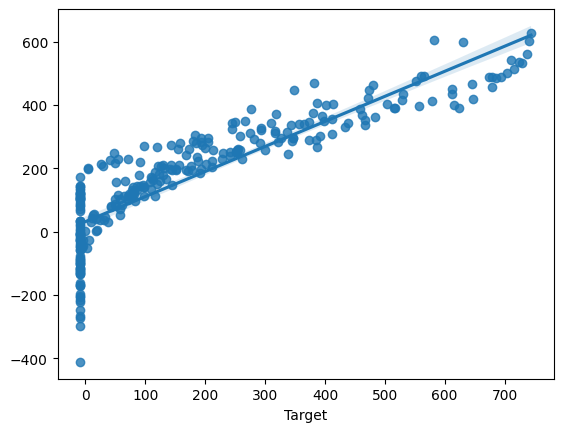

In [22]:
sns.regplot(x=y_test,y=lm_reg_pred)

In [23]:
lm_predictions = lm_reg_model.predict(df_p3_test_New_features)

In [24]:
metrics.mean_squared_error(y_test, lm_reg_pred)

10794.64495149472

RANDOM FOREST REGRESSION USING GRID SEARCH CV

In [25]:
#Random Forest Regression using grid search CV 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
param_grid = {'bootstrap': [True],
              'max_depth': [50, 70, 90, 120],
              'max_features':[2, 3, 4],
              'min_samples_leaf': [4, 5, 6],
              'n_estimators': [100,200,300,500]}
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv=3, n_jobs = -1, verbose = 2)

In [26]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 70, 90, 120],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [27]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=90, max_features=4, min_samples_leaf=4,
                      n_estimators=500)


In [28]:
best_rf_regcv = RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4, n_estimators=500, random_state=10)
best_rf_regcv.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4,
                      n_estimators=500, random_state=10)

In [29]:
pred_re_regcv = best_rf_regcv.predict(X_test)
pred_re_regcv

array([116.00532118, 193.87758859, 215.4467041 , 200.23642669,
       245.78806925, 116.35106259, 196.34314546, 224.28417084,
       183.45977726, 138.37322511, 165.09424255, 217.626065  ,
       162.15293007, 125.75541044, 133.54544937, 137.14307476,
       114.45375626, 124.6520457 , 100.43571645, 212.12654413,
       209.68545025, 245.69882398, 273.51892205, 168.71050003,
       132.97739977, 246.59480259,  84.57362885, 261.67932688,
       245.77298543, 157.27375047, 105.43259925, 159.47318379,
       190.36240668, 192.73379535, 263.91567127, 105.8926824 ,
       111.15678256, 169.51676203, 136.25529472, 100.12810911,
       138.37081433, 243.17640289, 112.61052237, 177.37266519,
       250.28340538,  95.50699606, 329.40188942, 224.23347438,
       117.81834096, 135.91962996, 274.5182728 , 247.66394129,
       365.87171974, 189.67513423, 158.24109741,  70.57508889,
       124.31052359, 232.87351919, 351.38420442,  86.23741945,
       107.30391772, 344.74179778, 174.83902365, 279.80

In [30]:
#predections on new data
predictions_new = best_rf_regcv.predict(df_p3_test_New_features)
predictions_new

array([ 84.96435747, 162.09712166, 378.37848866, ..., 124.65156887,
       247.04813678, 116.55958464])

In [31]:
# Mean square error of the bestfit model
metrics.mean_squared_error(y_test, pred_re_regcv)

20931.888415245026

DECISION TREE REGRESSOR


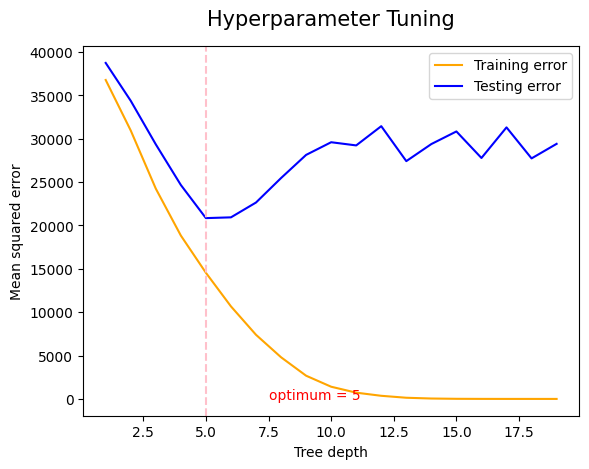

In [32]:
# using Decesion Tree Regressor to predict the values
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
train_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(data_p3_edited_features, data_p3_edited_outcome)
    train_error.append(mse(data_p3_edited_outcome, model_1.predict(data_p3_edited_features)))
    
test_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    test_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, train_error, color='orange', label='Training error')
plt.plot(max_depths, test_error, color='blue', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=5, color='pink', linestyle='--')
plt.annotate('optimum = 5', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [33]:
# performing grid search CV

model_dtr = DecisionTreeRegressor()
gridsearch_dtr = GridSearchCV(model_dtr,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=-1,
                  scoring='neg_mean_squared_error')
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 30, 10)},
             scoring='neg_mean_squared_error')

In [34]:
print(gridsearch_dtr.best_params_)

{'max_depth': 5, 'min_samples_split': 20}


In [35]:
#applying the best parameters from above results to train the model
new_model = DecisionTreeRegressor(max_depth=6,
                                  min_samples_split=20)
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=20)

In [36]:
#new predictions on test data
predictions = new_model.predict(X_test)
predictions

array([ 69.00772727, 283.94657143, 377.16346154, 279.16777778,
        28.08176471,  20.72680556,  33.10741379, 128.83181818,
       131.20909091,  33.10741379, 286.2       , 254.37148148,
       109.54641026,   3.37103226, 109.54641026,  33.10741379,
       266.94625   ,   3.37103226,   3.37103226, 127.77181818,
       492.33333333, 492.33333333, 333.0935    ,  37.76387097,
         3.37103226, 333.0935    , 109.54641026, 333.0935    ,
       127.77181818,  99.40636364,  51.5       ,  69.00772727,
       190.04392857, 283.94657143, 283.94657143,   3.37103226,
        15.12029412, 190.04392857, 109.54641026,   3.37103226,
       266.94625   , 374.96333333,   3.37103226, 109.54641026,
       283.94657143, 134.96181818, 333.0935    , 131.20909091,
        15.12029412, 109.54641026, 333.0935    , 283.94657143,
       696.50051282, 279.16777778, 179.265     ,  51.5       ,
        20.72680556, 190.04392857, 696.50051282, 109.54641026,
         3.37103226, 377.16346154,  33.10741379, 333.09

In [37]:
#predictions on Unseen data
new_predict_dtr = new_model.predict(df_p3_test_New_features)
new_predict_dtr

array([  3.37103226,  33.10741379, 696.50051282, ...,  28.08176471,
        99.40636364, 220.54      ])

In [38]:
# Mean square error of the DTR
metrics.mean_squared_error(y_test, predictions)

19800.329276409037

In [39]:
# Transfering the prediction data to test csv file.

data_p3_test['Target'] = lm_predictions
data_p3_test.to_csv('/content/CE802_P3_Test.csv')

In [41]:
data_p3_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,6.68,86.02,1995.28,148.00,853.52,Europe,-1048.23,-969.14,-26.56,Very high,...,39.15,65.01,-22.62,62241.18,1089.14,14.73,-191.24,1523.73,-14.81,-57.316600
1,3.86,44.75,2124.64,0.58,254.96,Europe,-1352.21,-713.96,-21.76,Low,...,51.90,39.03,-8.60,51324.96,604.73,12.06,-154.74,-1892.31,-39.83,27.437100
2,-0.84,95.33,2234.09,1.14,759.92,USA,-1883.28,304.16,-26.58,High,...,55.62,62.37,-12.14,68439.00,916.11,5.76,-105.98,-884.82,73.85,488.903937
3,3.34,100.87,1627.78,0.58,773.36,Rest,-114.23,32.26,-25.22,Low,...,60.66,61.47,-9.44,24517.71,576.57,8.73,-24.82,-424.65,6.99,203.715318
4,-1.32,100.36,1924.03,0.02,204.38,Europe,-1154.37,-948.02,-36.58,High,...,52.62,45.06,-21.16,51155.01,897.53,11.22,-92.04,-1446.90,12.78,14.721468
